<a href="https://colab.research.google.com/github/moisesmiiranda/ProjetoFuzzy/blob/main/selectProfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este algoritmo visa a utilização da biblioteca SKFUZZY **


*   Criar uma lógica fuzzy para indicar o perfil mais apto à uma determinada função da área de tecnologia da informação
*   Este é o primeiro protótipo **(ainda não levando em conta as habilidades para cada função)**



# Instalando a biblioteca ***scikit-fuzzy***

In [ ]:
#!pip install networkx==2.3 #necessário para rodar o skfuzzy
!pip install scikit-fuzzy

# Importação das bibliotecas numy, skfuzzy e o controlador fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Explicando as entradas do sistema

* **Entrada (antecedentes):** 

> Habilidades técnicas (Hard Skills): Domínio em Linguagens de Programação
>> Variável linguística: language

>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10 (representando a nota dada pelo avaliador)

>> Conjunto difuso (valores difusos): poor,lower , aceitavel e excelente.

> Habilidades não técnicas (Soft Skills)
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10 
**Variáveis linguísticas**
>> lower, low

# Explicando as saídas do sistema


* **Saida (consequentes):**
> Aqui será apresentado o resultado com base nas entradas e regras designadas no código

>> Universo (intervalo de valores nítidos/crisp):0 a 100%

>> Conjunto difuso (valores difusos): inapto, parcialmente apto, apto.
Representados numericamente de 0 a 100, onde 100 é o **apto** e 0 o **inapto**


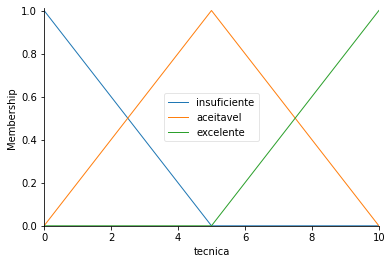

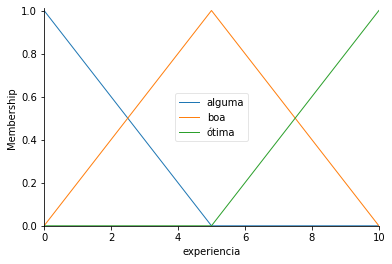

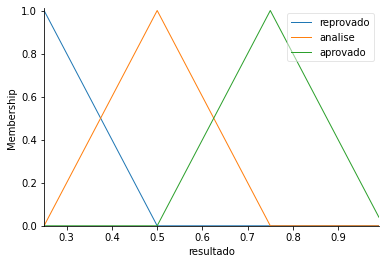

In [ ]:
hardSkill = ctrl.Antecedent(np.arange(0,11,1), 'hardSkill')
softSkill = ctrl.Antecedent(np.arange(0,11,1), 'softSkill')
 
resultado  = ctrl.Consequent(np.arange(0.25,1,0.01), 'resultado')
 
hardSkill.automf(names = ['insuficiente', 'aceitavel', 'excelente'])

softSkill.automf(names = ['alguma', 'boa', 'ótima']) 

resultado['reprovado'] = fuzz.trimf(resultado.universe,[0, 0.25, 0.50])
resultado['analise'] = fuzz.trimf(resultado.universe,[0.25,0.50,0.75]) 
resultado['aprovado'] = fuzz.trimf(resultado.universe,[0.50,0.75,1])
 
 
hardSkill.view()
softSkill.view()
resultado.view()

Resultado: 0.4117201016795768


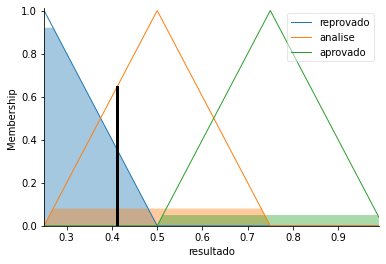

In [ ]:
#regras fuzzy 
#as novas regras serão baseadas nas funções, ou seja, terão regras para desenvolvedor, projetista, gerente de projeto, entre outros.
#Precisa-se verificar na literatura
regra1 = ctrl.Rule(softSkill['ótima'] | hardSkill['excelente'], resultado['aprovado'])
regra2 = ctrl.Rule(softSkill['ótima'] | hardSkill['insuficiente'], resultado['reprovado'])
regra3 = ctrl.Rule(softSkill['ótima'] | hardSkill['aceitavel'], resultado['aprovado'])

regra4 = ctrl.Rule(softSkill['boa'] | hardSkill['excelente'], resultado['aprovado'])
regra5 = ctrl.Rule(softSkill['boa'] | hardSkill['aceitavel'], resultado['aprovado'])
regra6 = ctrl.Rule(softSkill['boa'] | hardSkill['insuficiente'], resultado['reprovado'])

regra7 = ctrl.Rule(softSkill['alguma'] | hardSkill['aceitavel'], resultado['analise'])
regra8 = ctrl.Rule(softSkill['alguma'] | hardSkill['insuficiente'], resultado['reprovado'])
regra9 = ctrl.Rule(softSkill['alguma'] | hardSkill['excelente'], resultado['aprovado'])

resultado_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
resultado_simulador = ctrl.ControlSystemSimulation(resultado_ctrl)

#entrando com valores iniciais
resultado_simulador.input['hardSkill'] = 0.4
resultado_simulador.input['softSkill'] = 0.25
#computando os dados
resultado_simulador.compute()


print('Resultado:',resultado_simulador.output['resultado'])

#gerando o gráfico da saída

resultado.view(resultado_simulador)


